# **プログラミング基礎第10回**
グラフによる可視化2

---


## 今回の内容

前回の続き
- 円グラフ
- 複数のグラフ

NumPy を使って式をグラフにプロットする
- 三角関数とグラフ
- 引数の高度な機能
- 繰り返しが出てきたら関数やループを作る

応用例
- 物理法則を用いたプログラム
- 処理の階層化を行いプログラムの目的をはっきりさせる

### 今回の共通の設定

In [2]:
# Jupyter で matplotlib を使うためのおまじない
%matplotlib inline
# Matplotlib の pyplot を取り込んで plt の名前で使う
import matplotlib.pyplot as plt
# NumPy を取り込んで np の名前で使う
import numpy as np

## 円グラフ
matplotlib.pyplot.pie 関数

https://matplotlib.org/api/_as_gen/matplotlib.pyplot.pie.html

### 円グラフ1(基本)

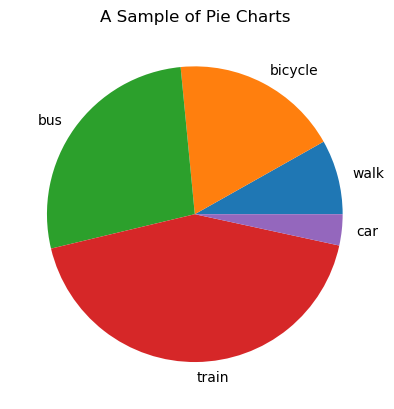

In [9]:
# 横軸右側(時計の3時の位置)から反時計回りに描画
# それぞれの面積は合計値に対する割合
lbs = ['walk', 'bicycle', 'bus', 'train', 'car']
num = [12, 27, 40, 63, 5]
plt.pie(num, labels=lbs) # 円グラフの指定
plt.title('A Sample of Pie Charts')
plt.show()

### 円グラフ2(詳細設定)

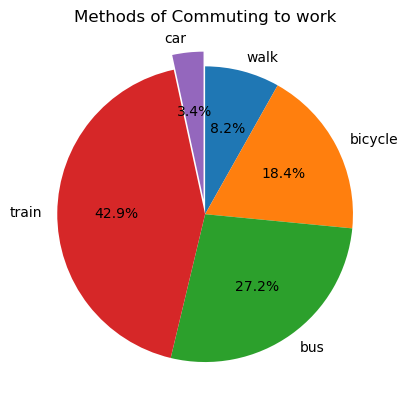

In [10]:
lbs = ['walk', 'bicycle', 'bus', 'train', 'car']
num = [12, 27, 40, 63, 5]
exp = [0, 0, 0, 0, 0.1] # 引き出す幅を半径に対する割合で指定
pct = '%.1f%%' # 数値表示:%.1fで小数点1桁,%%で%記号
plt.pie(num, labels=lbs, explode=exp, autopct=pct, startangle=90, counterclock=False)
# 開始位置90度から、時計回り
plt.title('Methods of Commuting to work')
plt.show()

## 複数のグラフ
matplotlib.pyplot.subplot 関数

https://matplotlib.org/api/_as_gen/matplotlib.pyplot.subplot.html

### 複数グラフ1(横2枚)

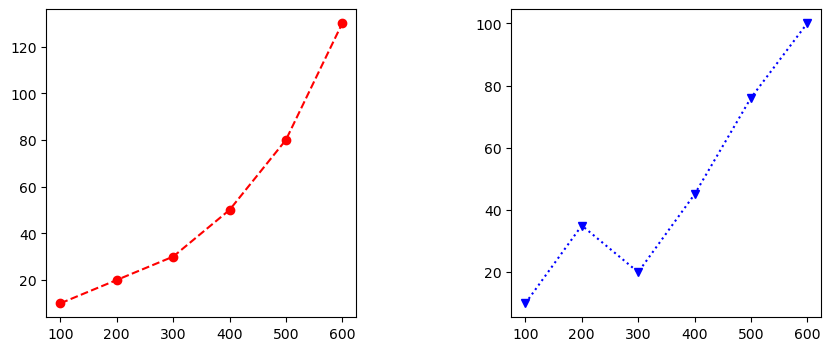

In [11]:
x = range(100, 700, 100)
y1 = [10, 20, 30, 50, 80, 130]
y2 = [10, 35, 20, 45, 76, 100]
plt.figure(figsize=(10, 4)) # 全体の横と縦のサイズ
plt.subplot(121) # 1x2 分割の1枚目 (1行2列)
plt.plot(x, y1, 'ro--')
plt.subplot(122) # 1x2 分割の2枚目
plt.plot(x, y2, 'bv:')
plt.subplots_adjust(wspace=0.5) # グラフの間隔
plt.show()

### 複数グラフ2(2x2の4枚)
配置番号

1 | 2
--|--
**3** | **4**

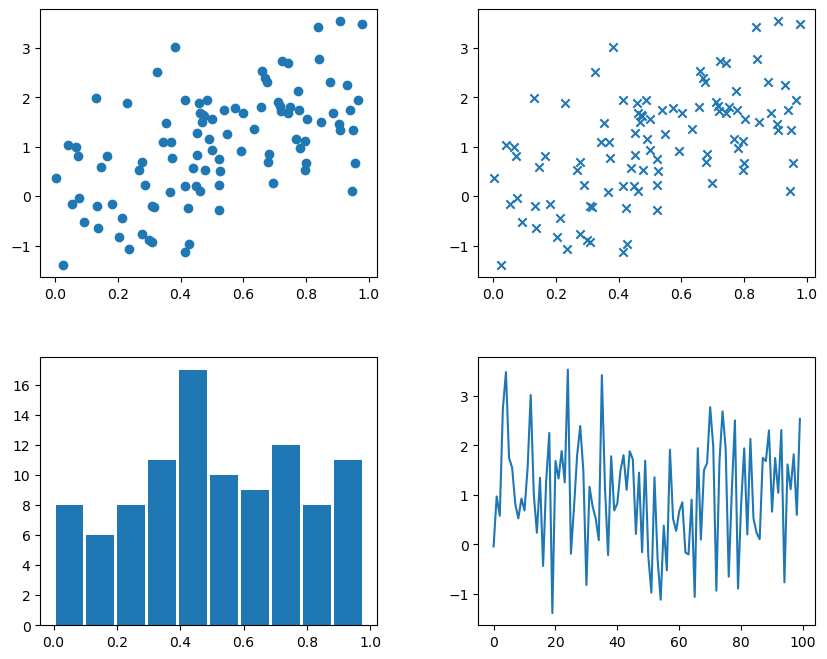

In [3]:
N = 100
np.random.seed(7)
x = np.random.rand(N) # 一様乱数
y = 2*x + np.random.randn(N) # 正規乱数
plt.figure(figsize=(10, 8)) # サイズ
plt.subplot(221) # 2x2 分割の左上
plt.scatter(x, y, marker='o')
plt.subplot(222) # 2x2 分割の右上
plt.scatter(x, y, marker='x')
plt.subplot(223) # 2x2 分割の左下
plt.hist(x, rwidth=0.9, bins=10)
plt.subplot(224) # 2x2 分割の右下
plt.plot(y)
# wspace: 横の間隔, hspace: 縦の間隔
plt.subplots_adjust(wspace=0.3, hspace=0.3)
plt.show()

## グラフ作成と関数

### グラフ作成の基本(復習)
レポートではグラフのタイトルやX軸Y軸の説明は必須項目

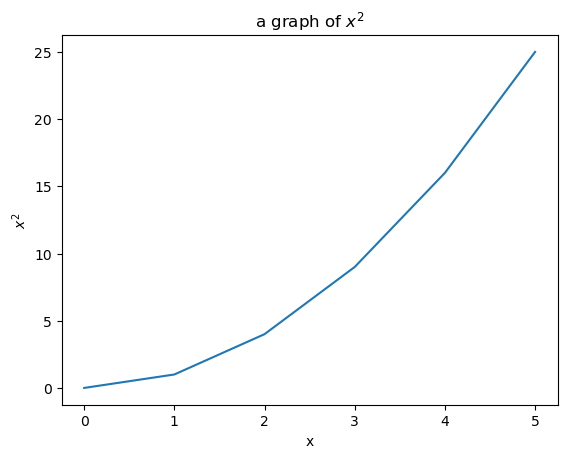

In [13]:
plt.title('a graph of $x^2$') # markdown と同じ数式が指定可
plt.xlabel('x')
plt.ylabel('$x^2$')
plt.plot([0, 1, 2, 3, 4, 5], [0, 1, 4, 9, 16, 25])
plt.show()

### グラフを書くための関数
グラフを書く度にタイトルなどを3行も使ってプログラムを書くのはスペースの無駄。
プログラムの主題がぼやける。

毎回使うならば関数にまとめた方が良い

In [14]:
def graph_title_label(title, xlbl, ylbl):
    plt.title(title)
    plt.xlabel(xlbl)
    plt.ylabel(ylbl)

def draw_simple_graph(x, y, title, xlbl, ylbl):
    graph_title_label(title, xlbl, ylbl)
    plt.plot(x, y)
    plt.show()

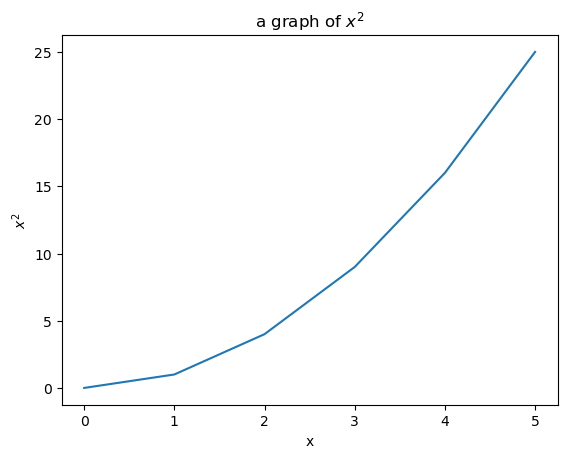

In [15]:
# draw_simple_graph を試す
x = [0, 1, 2, 3, 4, 5]
y = [0, 1, 4, 9, 16, 25]
draw_simple_graph(x, y, 'a graph of $x^2$', 'x', '$x^2$')

## NumPy とグラフ作成

### NumPyの復習
np.arange()は手軽に計算できる一連の数値を作り出す。
結果の整数倍は各要素を整数倍したものになる。

In [16]:
x = np.arange(0, 5)
y = 2 * x # numpy オブジェクトと単一数値との積
print(x, '->', y)

[0 1 2 3 4] -> [0 2 4 6 8]


### 綺麗な $x^2$ のグラフ
NumPy の作り出した数値の並びはグラフ描画に使える。

刻み値を細かくすれば線はなめらかになる。

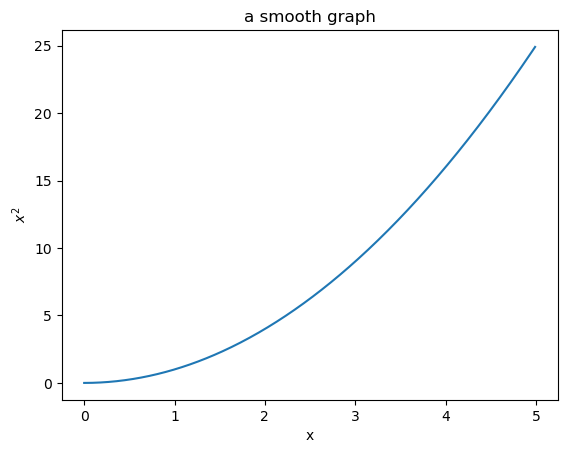

In [17]:
x = np.arange(0, 5, 0.01) # 0.01 刻み
y = x**2
draw_simple_graph(x, y, 'a smooth graph', 'x', '$x^2$')

### 三角関数の利用
NumPy には数学関数が多数ある。

三角関数はとても大切。

ただし角度の指定に注意が必要。

In [18]:
x = np.arange(0, 100, 30)
y = np.sin( x * np.pi/180 ) # 度数法から弧度法へ
print(x, '->', y)

y2 = np.sin(np.radians(x) ) # 変換関数の使用
print(x, '->', y2)

xr = np.radians(x)
y3 = np.sin(xr) + np.cos(xr)
print(x, '->', y3)

[ 0 30 60 90] -> [0.        0.5       0.8660254 1.       ]
[ 0 30 60 90] -> [0.        0.5       0.8660254 1.       ]
[ 0 30 60 90] -> [1.        1.3660254 1.3660254 1.       ]


### 弧度法(ラジアン)とは?
「円の半径に等しい長さの弧の中心に対する角度」

- 円周の公式: 円周 = 直径 × 円周率 ($2\pi r$と暗記したのでは?)
- 単位の表記は rad
- 度数法の $180^{\circ}$ は弧度法では $\pi$ rad
- 度数法でx度ならば、弧度法では $\frac{\pi}{180}x$ rad

プログラミングでの sin, cos は弧度法(ラジアン)で指定する。
NumPy では、`np.radians()` 関数を用いる。

>markdown では $\pi$ を \pi, sinを \sin, cos を \cos と表す。

### sin のグラフ

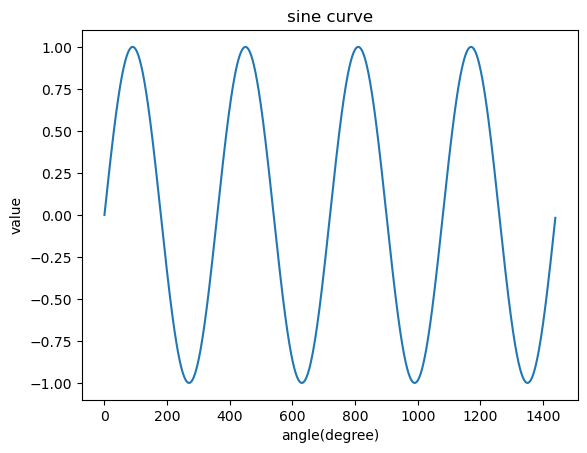

In [19]:
x = np.arange(0, 360*4)
s = np.sin(np.radians(x))
draw_simple_graph(x, s, 'sine curve', 'angle(degree)', 'value')

### sinとcos のグラフ

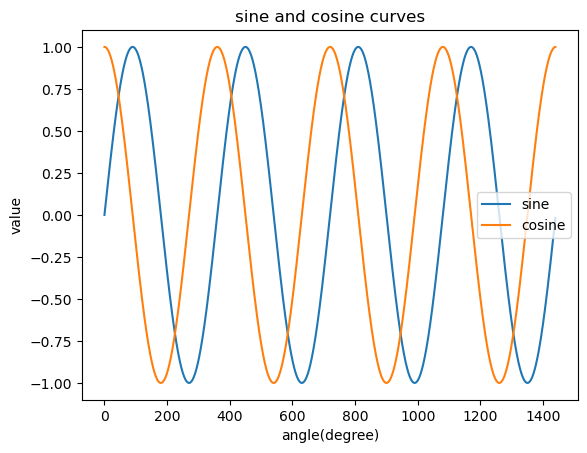

In [20]:
x = np.arange(0, 360*4)
s = np.sin(np.radians(x))
c = np.cos(np.radians(x))
graph_title_label('sine and cosine curves', 'angle(degree)', 'value')
plt.plot(x, s, label='sine')
plt.plot(x, c, label='cosine')
plt.legend() # 凡例を表示
plt.show()

### プログラムに対する考察
- `draw_simple_graph()` では単一のグラフは良かった
- しかし、複数の線を描画できない
- タイトルは `graph_title_label()` 関数を利用できる
- しかし、sinとcos のグラフでは、他の設定が多すぎる

### グラフ描画関数の作成
凡例も含めて `plt.plot()` 関数は3個の引数が必要。
その3つ組をタプルのリストにすればうまく設定できそう。

In [21]:
def draw_graph(data, title, xlbl, ylbl, show=True):
    graph_title_label(title, xlbl, ylbl)
    for x, y, lbl in data: # タプルのリストを想定
        plt.plot(x, y, label=lbl)
    
    if len(data) > 1: # 複数データならば凡例
        plt.legend()
    
    if show:
        plt.show()

### デフォルト引数
引数のデフォルトの値を関数定義で指定できる。
呼び出し時に引数を省略できる。

In [22]:
# デフォルト引数の例
def func(a, b=10):
    print(a, b)

func(5) # 2番目の引数を省略
func(5, 20) # 省略なし

5 10
5 20


### None という値
引数の値を必ずしも使用しない場合には値 `None` が役に立つ。

整数0や-1は何らかの意味を持つが、指定なしを表したい時。

None は is 演算子を使って調べる (bool 型の `False` と評価される)。

In [23]:
def func2(a=None):
    print(a, end=', ')
    if a is None:
        print('a is None', end=', ')
    else:
        print('a = ', a, end=', ')
        
    if a:
        print('a is evaluated as True')
    else:
        print('a is evaluated as False')

func2()
func2(None)
func2(10)
func2(0)

None, a is None, a is evaluated as False
None, a is None, a is evaluated as False
10, a =  10, a is evaluated as True
0, a =  0, a is evaluated as False


### タプルの確認
タプルの要素は代入で取り出せる。

In [24]:
x = (1, 2, 3)
a, b, c = x
print('a=', a, ', b=', b, ', c=', c)

# タプルのリストの場合
tlist = [(1, 2, 3), (4, 5, 6), (7, 8, 9)]
for a, b, c in tlist:
    print('a=', a, ', b=', b, ', c=', c)

a= 1 , b= 2 , c= 3
a= 1 , b= 2 , c= 3
a= 4 , b= 5 , c= 6
a= 7 , b= 8 , c= 9


### draw_graph を試す

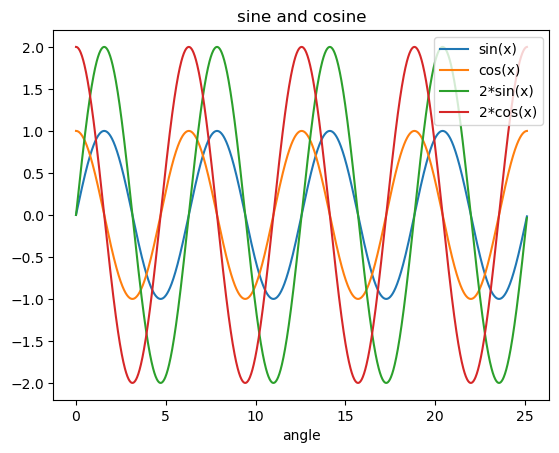

In [25]:
x = np.radians(np.arange(0, 360*4))
d = [(x, np.sin(x), 'sin(x)'),
     (x, np.cos(x), 'cos(x)'),
     (x, 2*np.sin(x), '2*sin(x)'),
     (x, 2*np.cos(x), '2*cos(x)')]
draw_graph(d, 'sine and cosine', 'angle', None)

### 複数のグラフについて考える

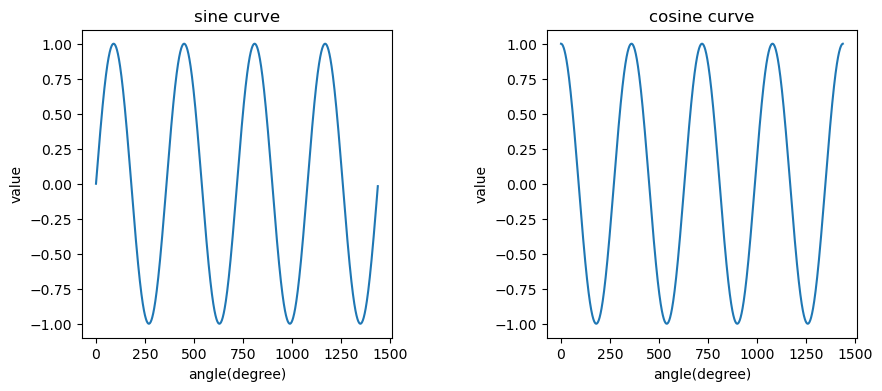

In [26]:
x = np.arange(0, 360*4)
s = np.sin(np.radians(x))
c = np.cos(np.radians(x))

plt.figure(figsize=(10, 4))

plt.subplot(121) # 1x2 のグラフの1個目
plt.title('sine curve')
plt.xlabel('angle(degree)')
plt.ylabel('value')
plt.plot(x, s)

plt.subplot(122) # 1x2 のグラフの2個目
plt.title('cosine curve')
plt.xlabel('angle(degree)')
plt.ylabel('value')
plt.plot(x, c)

plt.subplots_adjust(wspace=0.5)
plt.show()

### 関数の積極的な利用
`plt.subplot()` 関数はグラフの切り替えと考えられる。

`draw_graph()`関数(参照:p.23)が利用できる。

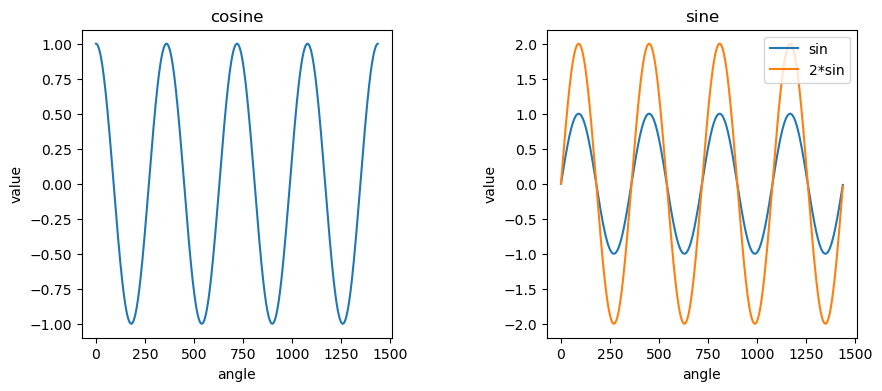

In [27]:
x = np.arange(0, 360*4)
s = np.sin(np.radians(x))
c = np.cos(np.radians(x))

plt.figure(figsize=(10, 4))

plt.subplot(1, 2, 1) # (121) は分けて指定しても良い
draw_graph([(x, c, '')], 'cosine', 'angle', 'value', False)

plt.subplot(1, 2, 2)
draw_graph([(x, s, 'sin'), (x, 2*s, '2*sin')], 'sine', 'angle', 'value', False)

plt.subplots_adjust(wspace=0.5)
plt.show()

### よく使うものを関数に
1x2, 2x1, 2x2 の並べる形状、グラフの大きさ、間隔、データの情報を指定できれば良い。

それらを簡易に指定する関数を作る。

enumerate()は6回目の資料。

In [28]:
def draw_subgraph(nm, size, space, dat):
    n, m = nm # グラフの形状nxm
    if len(dat) != n*m:
        print('error')
        return
    
    # グラフの大きさ
    plt.figure(figsize=size)
    for i, g in enumerate(dat):
        plt.subplot(n, m, i+1)
        t, xl, yl, d = g
        draw_graph(d, t, xl, yl, False)
    
    wsp, hsp = space # 横と縦のスペース
    plt.subplots_adjust(wspace=wsp, hspace=hsp)
    plt.show()

### 呼び出してみる
2x1 のグラフ、サイズ (10,5), スペースは横: 無効、縦:0.5

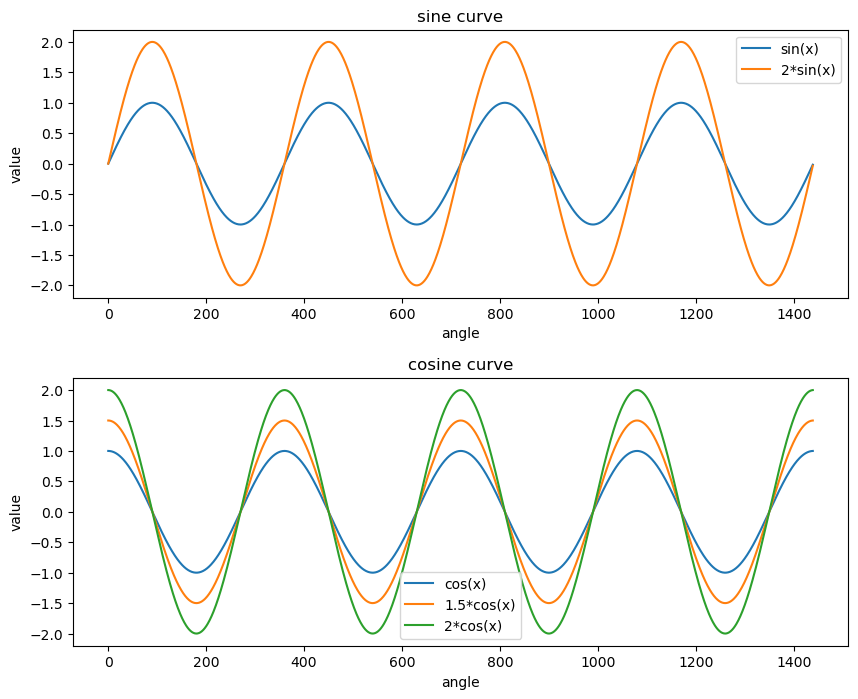

In [29]:
x = np.arange(0, 360*4)
s = np.sin(np.radians(x))
c = np.cos(np.radians(x))

d = [
    ('sine curve', 'angle', 'value',
     [(x, s, 'sin(x)'), (x, 2*s, '2*sin(x)')]),
    ('cosine curve', 'angle', 'value',
     [(x, c, 'cos(x)'), (x, 1.5*c, '1.5*cos(x)'), (x, 2*c, '2*cos(x)')])
]

draw_subgraph((2, 1), (10, 8), (None, 0.3), d)

## 応用例

### ニュートンの万有引力の法則

質量 $m_1, m_2$ の二つの物体 (kg)

それぞれは距離 r だけ離れている (m)

重力定数 $G (6.674 \times 10^{-11} Nm^2/kg^2)$

2つの物体は力 $F = \frac{Gm_1m_2}{r^2}$ でお互いに引き寄せる

力の単位はNで1kgの物体に $1m/s^2$ の加速度を生じさせることを意味する $(kg \cdot m/s^2)$

#### 2つの物体間の距離と重力の関係

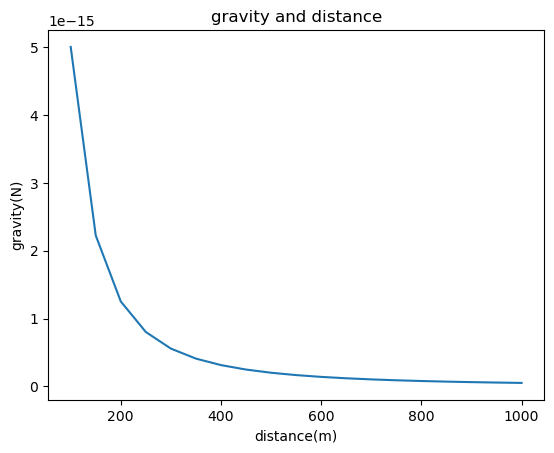

In [30]:
def force(m1, m2, r): # 重さと距離
    g = 6.674 * 10**(-11) # 重力定数
    return g * (m1 * m2) / (r**2)

r = np.arange(100, 1001, 50)
f = force(0.5, 1.5, r)

# `draw_simple_graph`を再定義して使用します。
def draw_simple_graph(x, y, title, xlbl, ylbl):
    graph_title_label(title, xlbl, ylbl)
    plt.plot(x, y)
    plt.show()

draw_simple_graph(r, f, 'gravity and distance', 'distance(m)', 'gravity(N)')

#### 複数の重さについて調べる

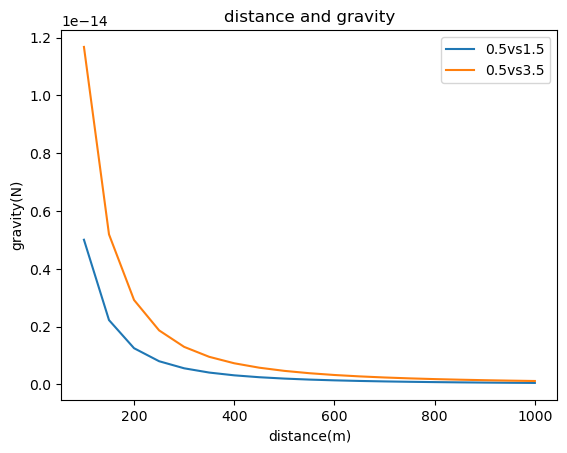

In [31]:
r = np.arange(100, 1001, 50)
d = [(r, force(0.5, 1.5, r), '0.5vs1.5'),
     (r, force(0.5, 3.5, r), '0.5vs3.5')]

draw_graph(d, 'distance and gravity', 'distance(m)', 'gravity(N)')

### 投射運動の計算
初速度 $v$ (m/s), 投射角度 $\theta$ でボールを投げる。摩擦抵抗は無視する。
ボールの速度は、水平方向(x軸方向)と垂直(y軸方向)とで以下のように分けられる。
$$ v_x(0) = v \cos{\theta} $$
$$ v_y(0) = v \sin{\theta} $$

水平方向の速度は摩擦を無視したので一定である。垂直方向の速度の変化は、gを重力加速度(単位は $m/s^2$)、tを投射からの経過時間(単位は s, 秒)とすると、次式で表せる。
$$ v_y(t) = v \sin{\theta} - gt $$

投射後に最高点(peak)に達した時には、$v_y(t_{peak}) = 0$ である。従って、その際の $t_{peak}$ が以下の計算で得られる。
$$ v_y(t_{peak}) = v \sin{\theta} - gt_{peak} = 0 $$
$$ t_{peak} = \frac{v \sin{\theta}}{g} $$

### 投射運動の計算(続き)
ボールは最高点に達した後には、同じ時間をかけて落下する。つまり、飛行時間 $t_{flight}$ は次式で得られる。
$$ t_{flight} = 2t_{peak} = 2\frac{v \sin{\theta}}{g} $$

時刻0からaまでの垂直方向の移動距離 $S_y(a)$ は、速度の式 $v_y(t)$ を時刻0からaまで積分することで得られる。
$$ S_y(a) = \int_{0}^{a} (v \sin{\theta} - gt)dt = v(\sin{\theta})a - \frac{1}{2}ga^2 $$

水平方向の移動距離も同じように定積分で計算できるが等速運動なので $S_x(a) = v_x a$ である。まとめると時間と移動距離の関係は以下となる。
$$ 
\left\{ 
\begin{array}{l} 
S_x(t) = v(\cos{\theta})t \\ 
S_y(t) = v(\sin{\theta})t - \frac{1}{2}gt^2 
\end{array} 
\right. 
$$

### Markdown について
- 分数: `\frac{b}{a}` -> $\frac{b}{a}$
- 積分: `\int_{0}^{n}x^{2}dx` -> $\int_{0}^{n}x^{2}dx$
- 単語を斜字体にしない: `\mathrm{peak}` -> $\mathrm{peak}$
- 大きな括弧: 
```
\left\{ \begin{array}{l} S_{x}(t)=2t \\ S_{y}(t)=4t^{2} \end{array} \right.
```
$$ \left\{ \begin{array}{l} S_{x}(t)=2t \\ S_{y}(t)=4t^{2} \end{array} \right. $$

### 軌跡の計算
trajectory: 軌道, 軌跡

これまでと違い x, y の双方を計算で求める。

グラフ作成で使うことを想定して凡例の文字列も生成する。

x, y の計算式を確認せよ。

In [32]:
# 軌跡の計算, v:初速(m/s), a:投射角度(度)
# x, y, ラベル文字列の三つ組タプルを返す
def trajectory(v, a):
    theta = np.radians(a)
    g = 9.8 # 重力加速度(m/s^2)
    t_flight = 2 * v * np.sin(theta) / g # 飛行時間
    
    # ここから配列データ
    t = np.arange(0, t_flight, 0.01) # 時間間隔
    x = v * np.cos(theta) * t
    y = v * np.sin(theta) * t - 0.5 * g * t**2
    
    # ラベルを作成
    lbl = 'v:' + str(v) + ', a:' + str(a)
    return (x, y, lbl) # タプルにして返す

### 軌跡計算の描画

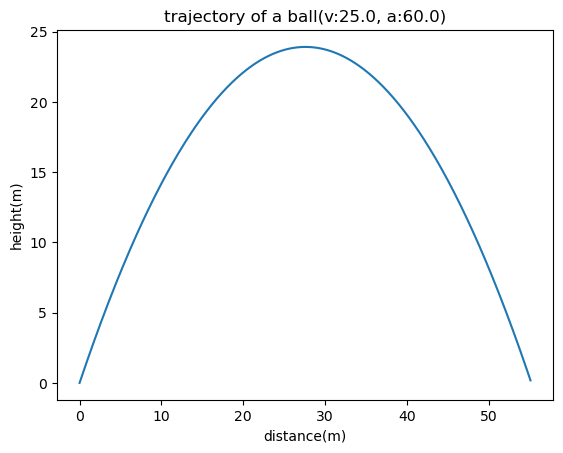

In [33]:
# `draw_simple_graph`を再定義して使用します。
def draw_simple_graph(x, y, title, xlbl, ylbl):
    graph_title_label(title, xlbl, ylbl)
    plt.plot(x, y)
    plt.show()

v = float(input('初速度を入力 (m/s): '))
a = float(input('投射角度を入力(度): '))

x, y, lbl = trajectory(v, a)

draw_simple_graph(x, y, 'trajectory of a ball(' + lbl + ')', 'distance(m)', 'height(m)')

### 異なる初速度の比較
`trajectory` 関数の結果はそのままリストにする。

`draw_graph` にない設定は先に行う。

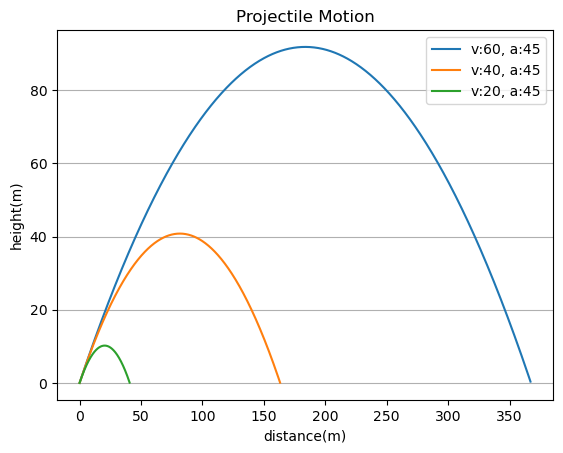

In [34]:
degree = 45 # 角度
vlist = [60, 40, 20] # 初速度のリスト

d = [trajectory(v, degree) for v in vlist]

plt.grid(axis='y') # グラフの追加設定は先に行う
draw_graph(d, 'Projectile Motion', 'distance(m)', 'height(m)')

## まとめ
- 円グラフ
- 複数のグラフ
- グラフ作成用の関数
- NumPy を用いたグラフ作成
- 応用例
    - ニュートンの万有引力の法則
    - 投射運動のグラフ作成